# Pandas Worksheet Solutions

In [1]:
import pandas as pd
%matplotlib inline

The goal of this worksheet is to provide practical examples of aggregating (with group by), plotting, and pivoting data with the Pandas Python package.

This worksheet is available as a jupyter notebook on github here: https://github.com/JBed/Pandas_Analysis_Worksheet

Get the data here: https://www.kaggle.com/dansbecker/nba-shot-logs 

Finally, if you have any questions, comments, or believe that I did anything incorrectly feel free to email me here: jason@jbedford.net

In [2]:
df = pd.read_csv('nba-shot-logs.zip')

The data is structured so that each row corresponds to one shot taking during the 2014-2015 NBA season (We exclude free throws).

In [18]:
df.head(2)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148


In [4]:
df.columns

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id'],
      dtype='object')

Most of the column names are self-explanatory. One thing that initially confused me was that there is no column telling us the team of the player taking the shot. It turns out that that information is hidden in the MATCHUP column. 

In [24]:
df.set_index('GAME_ID').loc[21400899]['MATCHUP'].unique()

array(['MAR 04, 2015 - CHA @ BKN', 'MAR 04, 2015 - BKN vs. CHA'], dtype=object)

We see that the name of the team of the player taking the shot is the first team listed after the date. It turns out that having things structured this way is actually very convenient.

## Part1: Questions about SHOT_RESULT for one team in a one game

Here It makes sense restructure our data so that each row is referring to one team in one game and the columns give us the number of shots made or missed. This can be done with either DataFrame.groupby or pandas.pivot_table which I show below.

In [27]:
shot_result_by_matchup = df.groupby(['MATCHUP','SHOT_RESULT']).size().unstack()

In [28]:
shot_result_by_matchup.head()

SHOT_RESULT,made,missed
MATCHUP,,
"DEC 01, 2014 - DEN @ UTA",39,41
"DEC 01, 2014 - LAC vs. MIN",36,33
"DEC 01, 2014 - MIA @ WAS",31,35
"DEC 01, 2014 - MIN @ LAC",30,38
"DEC 01, 2014 - PHI vs. SAS",28,37


In [33]:
df.pivot_table(index='MATCHUP', columns='SHOT_RESULT', \
               values='W',aggfunc=lambda x: len(x)).head()

SHOT_RESULT,made,missed
MATCHUP,,
"DEC 01, 2014 - DEN @ UTA",39,41
"DEC 01, 2014 - LAC vs. MIN",36,33
"DEC 01, 2014 - MIA @ WAS",31,35
"DEC 01, 2014 - MIN @ LAC",30,38
"DEC 01, 2014 - PHI vs. SAS",28,37


Personally I find the groupby operation to be more expressive. 

### Q1.1 which team made the most and least shots in a game

This is done by sorting the above on made

In [37]:
shot_result_by_matchup.sort_values(by='made').head()

SHOT_RESULT,made,missed,total
MATCHUP,,,
"FEB 09, 2015 - GSW @ PHI",2,9,11
"FEB 09, 2015 - PHI vs. GSW",3,7,10
"MAR 04, 2015 - NYK @ IND",7,18,25
"OCT 29, 2014 - PHI @ IND",9,25,34
"FEB 11, 2015 - MIN vs. GSW",11,27,38


In [38]:
shot_result_by_matchup.sort_values(by='made', ascending=False).head()

SHOT_RESULT,made,missed,total
MATCHUP,,,
"NOV 28, 2014 - LAL vs. MIN",48,41,89
"DEC 27, 2014 - SAC vs. NYK",48,39,87
"DEC 08, 2014 - WAS vs. BOS",48,39,87
"NOV 07, 2014 - CHA vs. ATL",47,46,93
"JAN 12, 2015 - TOR vs. DET",47,39,86


### Q1.2: which team took the most and least shots in a game.

We'll make a new column called total and sort on that.

In [34]:
shot_result_by_matchup['total'] = shot_result_by_matchup.sum(axis=1)

In [35]:
shot_result_by_matchup.sort_values(by='total').head()

SHOT_RESULT,made,missed,total
MATCHUP,,,
"FEB 09, 2015 - PHI vs. GSW",3,7,10
"FEB 09, 2015 - GSW @ PHI",2,9,11
"MAR 04, 2015 - NYK @ IND",7,18,25
"FEB 28, 2015 - NYK vs. TOR",13,14,27
"FEB 23, 2015 - MIN @ HOU",14,19,33


These are likely game that were canceled

In [36]:
shot_result_by_matchup.sort_values(by='total',ascending=False).head()

SHOT_RESULT,made,missed,total
MATCHUP,,,
"FEB 07, 2015 - DAL vs. POR",43,62,105
"JAN 29, 2015 - CHI @ LAL",42,61,103
"NOV 30, 2014 - TOR @ LAL",44,58,102
"DEC 03, 2014 - SAS @ BKN",36,65,101
"OCT 29, 2014 - CHA vs. MIL",41,60,101


### Q1.3 Which team made the most shots as a percentage of all shots taken in a game

we'll make a derived column called make_percent and sort on that.

In [39]:
shot_result_by_matchup['make_percent'] = \
round((shot_result_by_matchup['made'] / shot_result_by_matchup['total'])*100,1)

In [40]:
shot_result_by_matchup.sort_values(by='make_percent').head()

SHOT_RESULT,made,missed,total,make_percent
MATCHUP,,,,
"FEB 09, 2015 - GSW @ PHI",2,9,11,18.2
"OCT 29, 2014 - PHI @ IND",9,25,34,26.5
"MAR 04, 2015 - NYK @ IND",7,18,25,28.0
"NOV 16, 2014 - OKC vs. HOU",13,33,46,28.3
"JAN 13, 2015 - LAL vs. MIA",23,58,81,28.4


In [41]:
shot_result_by_matchup.sort_values(by='make_percent', ascending=False).head()

SHOT_RESULT,made,missed,total,make_percent
MATCHUP,,,,
"DEC 22, 2014 - SAS vs. LAC",44,25,69,63.8
"JAN 16, 2015 - ATL @ TOR",40,23,63,63.5
"DEC 07, 2014 - MEM vs. MIA",40,23,63,63.5
"NOV 15, 2014 - CLE vs. ATL",39,23,62,62.9
"NOV 14, 2014 - NOP vs. MIN",42,25,67,62.7


## Part 2: Questions about SHOT_RESULT and W for one team in a one game

Here we’ll make a dataframe similar to the above but with 'W' as a column

In [53]:
shot_and_game_result_by_matchup = df.groupby(['MATCHUP','W','SHOT_RESULT']).size().unstack()

In [54]:
shot_and_game_result_by_matchup.head()

,SHOT_RESULT,made,missed
MATCHUP,W,,
"DEC 01, 2014 - DEN @ UTA",W,39,41
"DEC 01, 2014 - LAC vs. MIN",W,36,33
"DEC 01, 2014 - MIA @ WAS",L,31,35
"DEC 01, 2014 - MIN @ LAC",L,30,38
"DEC 01, 2014 - PHI vs. SAS",L,28,37


We want 'W' to be a column not part of the index as it is now

In [55]:
shot_and_game_result_by_matchup = \
shot_and_game_result_by_matchup.reset_index().set_index('MATCHUP')

In [56]:
shot_and_game_result_by_matchup.head()

SHOT_RESULT,W,made,missed
MATCHUP,,,
"DEC 01, 2014 - DEN @ UTA",W,39,41
"DEC 01, 2014 - LAC vs. MIN",W,36,33
"DEC 01, 2014 - MIA @ WAS",L,31,35
"DEC 01, 2014 - MIN @ LAC",L,30,38
"DEC 01, 2014 - PHI vs. SAS",L,28,37


### Q2.1 which team had the lowest make percentage (in a single game) but still won that game.

Again we'll make a derived column called make_percent

In [57]:
shot_and_game_result_by_matchup['make_percent'] = \
round((shot_and_game_result_by_matchup['made']/\
       shot_and_game_result_by_matchup.sum(axis=1))*100,1)

In [58]:
shot_and_game_result_by_matchup[\
shot_and_game_result_by_matchup['W']=='W'].sort_values(by='make_percent').head()

SHOT_RESULT,W,made,missed,make_percent
MATCHUP,,,,
"FEB 09, 2015 - GSW @ PHI",W,2,9,18.2
"NOV 16, 2014 - HOU @ OKC",W,20,49,29.0
"JAN 24, 2015 - CHA vs. NYK",W,23,50,31.5
"DEC 31, 2014 - OKC vs. PHX",W,21,44,32.3
"JAN 17, 2015 - CHA vs. IND",W,31,65,32.3


In [59]:
shot_and_game_result_by_matchup[\
shot_and_game_result_by_matchup['W']=='L'].sort_values(by='make_percent', \
                                                       ascending=False).head()

SHOT_RESULT,W,made,missed,make_percent
MATCHUP,,,,
"JAN 14, 2015 - HOU @ ORL",L,36,22,62.1
"NOV 18, 2014 - NYK @ MIL",L,31,21,59.6
"DEC 03, 2014 - MIA vs. ATL",L,33,23,58.9
"NOV 14, 2014 - BOS vs. CLE",L,45,33,57.7
"NOV 19, 2014 - NYK @ MIN",L,31,23,57.4


### Q2.2 Did winning teams have a higher make percentage on average than losing teams?

We'll explore this question with a group and a plot

In [60]:
shot_and_game_result_by_matchup.groupby('W')['make_percent'].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
W,,,,,,,,
L,904.0,42.667146,5.415448,26.5,39.2,42.95,46.2,62.1
W,904.0,47.793363,5.583023,18.2,44.2,47.70,51.5,63.8


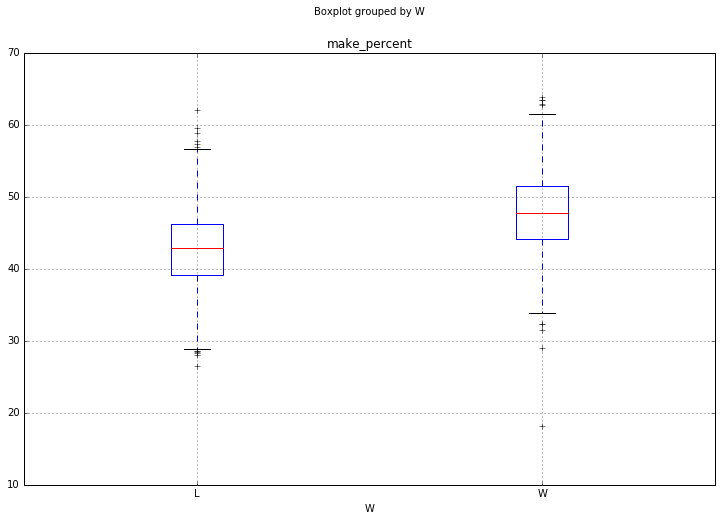

In [61]:
shot_and_game_result_by_matchup.boxplot(column='make_percent', by='W',figsize=(12,8))

## Part3: Questions comparing two teams in one game.

### Q 3.1: How often did the winning team will have a lower make percentage than the losing team

Here it looks like we need to compare two rows in the shot_and_game_result_by_matchup dataframe. Don't do that! Remember that columns are for comparing not rows. Let me say that again 

## compare columns not rows!!!


ok so how do we turn two rows into two columns?

In [95]:
shot_result_by_gameid_and_w = \
df.groupby(['GAME_ID','W','SHOT_RESULT']).size().unstack()

In [96]:
shot_result_by_matchup_gameid.head(4)

SHOT_RESULT  made  missed  make_percent
GAME_ID  W                             
21400001 L     29      46      0.386667
         W     36      51      0.413793
21400002 L     31      36      0.462687
         W     37      33      0.528571

In [97]:
shot_result_by_gameid_and_w['make_percent'] = \
round((shot_result_by_gameid_and_w['made']/\
       shot_result_by_gameid_and_w.sum(axis=1))*100,1)

In [98]:
shot_result_by_gameid_and_w.head(4)

SHOT_RESULT  made  missed  make_percent
GAME_ID  W                             
21400001 L     29      46          38.7
         W     36      51          41.4
21400002 L     31      36          46.3
         W     37      33          52.9

In [101]:
shot_result_by_gameid_and_w = \
shot_result_by_gameid_and_w.reset_index()

In [84]:
shot_result_by_gameid_and_w.head(4)

SHOT_RESULT,GAME_ID,W,make_percent
0,21400001,L,38.7
1,21400001,W,41.4
2,21400002,L,46.3
3,21400002,W,52.9


In [85]:
make_percent_by_gameid = \
shot_result_by_gameid_and_w.pivot(index='GAME_ID', columns='W')

In [106]:
make_percent_by_gameid.head()

SHOT_RESULT made     missed     make_percent      
W              L   W      L   W            L     W
GAME_ID                                           
21400001      29  36     46  51         38.7  41.4
21400002      31  37     36  33         46.3  52.9
21400003      26  22     42  27         38.2  44.9
21400004      28  41     32  60         46.7  40.6
21400005       9  36     25  41         26.5  46.8

In [107]:
make_percent_by_gameid[\
make_percent_by_gameid['make_percent']['W']<\
make_percent_by_gameid['make_percent']['L']].head()

SHOT_RESULT made     missed     make_percent      
W              L   W      L   W            L     W
GAME_ID                                           
21400004      28  41     32  60         46.7  40.6
21400008      38  33     35  41         52.1  44.6
21400011      21  27     38  50         35.6  35.1
21400016      33  36     31  35         51.6  50.7
21400020      15  34     21  49         41.7  41.0

In [108]:
len(make_percent_by_gameid[\
make_percent_by_gameid['make_percent']['W']<\
make_percent_by_gameid['make_percent']['L']])

197

In [109]:
len(make_percent_by_gameid)

904

In [110]:
(197./904)*100

21.792035398230087

So about %22 of the time the game is won by the team that has the lower make percentage.